In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [4]:
# Split features and target variable for classification
X_cls = df.drop('ShelveLoc', axis=1)
y_cls = df['ShelveLoc']

In [5]:
# Split features and target variable for regression
X_reg = df.drop('Price', axis=1)
y_reg = df['Price']

In [6]:
# Splitting data for classification tasks
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [7]:
# Splitting data for regression task
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [8]:
# Standardize features for regression
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [9]:
# Decision Tree Classifier using Entropy Criteria with Hyperparameter Tuning
param_grid_cls = {'max_depth': [3, 5, 7, None]}
clf_entropy = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=42),
                           param_grid=param_grid_cls, cv=5)
clf_entropy.fit(X_train_cls, y_train_cls)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [3, 5, 7, None]})

In [10]:
# Decision Tree Classifier using Gini Criteria (CART) with Hyperparameter Tuning
clf_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state=42),
                        param_grid=param_grid_cls, cv=5)
clf_gini.fit(X_train_cls, y_train_cls)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None]})

In [11]:
# Gradient Boosting Regressor with Hyperparameter Tuning
param_grid_gb = {'n_estimators': [50, 100, 150],
                 'max_depth': [3, 5, 7]}
gb_reg = GridSearchCV(GradientBoostingRegressor(random_state=42),
                      param_grid=param_grid_gb, cv=5)
gb_reg.fit(X_train_reg_scaled, y_train_reg)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [12]:
# Decision Tree Regression with Hyperparameter Tuning
param_grid_reg = {'max_depth': [3, 5, 7, None]}
regressor = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         param_grid=param_grid_reg, cv=5)
regressor.fit(X_train_reg_scaled, y_train_reg)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None]})

In [19]:
# Best models after hyperparameter tuning
best_clf_entropy = clf_entropy.best_estimator_
best_clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [20]:
best_clf_gini = clf_gini.best_estimator_
best_clf_gini


DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
best_gb_reg = gb_reg.best_estimator_
best_gb_reg


GradientBoostingRegressor(n_estimators=150, random_state=42)

In [22]:
best_regressor = regressor.best_estimator_
best_regressor

DecisionTreeRegressor(max_depth=3, random_state=42)

In [23]:
# Predictions for classification
y_pred_cls_entropy = best_clf_entropy.predict(X_test_cls)
y_pred_cls_entropy


array([2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2])

In [24]:
y_pred_cls_gini = best_clf_gini.predict(X_test_cls)
y_pred_cls_gini

array([2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

In [25]:
# Predictions for regression
y_pred_reg = best_regressor.predict(X_test_reg_scaled)
y_pred_reg



array([104.9375    , 115.69047619,  97.66666667, 129.37313433,
       112.36842105, 104.9375    ,  70.15384615,  97.66666667,
       112.36842105, 135.5625    , 129.37313433, 112.36842105,
       112.36842105, 115.69047619, 112.36842105,  70.15384615,
       115.69047619, 112.36842105, 112.36842105, 129.37313433,
        97.66666667, 135.5625    , 152.5       , 104.9375    ,
       112.36842105, 152.5       , 112.36842105, 104.9375    ,
       115.69047619, 115.69047619, 112.36842105, 112.36842105,
       115.69047619, 104.9375    , 112.36842105, 129.37313433,
       129.37313433, 112.36842105, 112.36842105, 152.5       ,
       129.37313433, 152.5       ,  70.15384615, 112.36842105,
       135.5625    , 115.69047619,  97.66666667, 115.69047619,
       129.37313433, 129.37313433, 112.36842105, 112.36842105,
       115.69047619,  70.15384615, 112.36842105, 129.37313433,
       104.9375    ,  97.66666667, 112.36842105, 112.36842105,
       112.36842105, 135.5625    , 112.36842105, 129.37

In [26]:
y_pred_gb_reg = best_gb_reg.predict(X_test_reg_scaled)
y_pred_gb_reg

array([ 98.41122123, 129.59754709, 112.40976336, 120.30845048,
       113.80970534, 125.55221042,  72.42769233,  92.00202198,
       123.13035569, 130.64823497, 127.30360563, 110.30285897,
        91.69127156, 118.40683542, 119.3552877 ,  54.10112458,
       133.16986169,  97.29077951, 118.22139418, 132.71061009,
       110.19991576, 124.18301756, 139.81676761, 103.22961035,
       104.09740983, 140.85498502, 100.11205682, 100.394577  ,
       126.88598566, 119.41962156, 130.33070183, 109.03949414,
       113.22033325,  99.97008729, 110.110722  , 121.50744852,
       131.53997373, 126.45501117, 115.6001845 , 131.83637646,
       124.28135414, 139.97577238,  70.37232644,  94.59864747,
       136.8702782 , 120.58862643,  98.72811462, 106.71935484,
       130.14723602, 127.71607828,  98.7039833 , 115.72734014,
       116.10606679,  89.78062012, 108.59288467, 130.9089453 ,
       111.82955693, 106.63623613, 110.76426723, 127.61484883,
       122.73040539, 123.81261204,  96.36671481, 130.88

In [27]:
# Evaluation for classification
accuracy_entropy = accuracy_score(y_test_cls, y_pred_cls_entropy)
accuracy_entropy


0.5625

In [28]:
accuracy_gini = accuracy_score(y_test_cls, y_pred_cls_gini)
accuracy_gini

0.6

In [ ]:
#Both models achieved moderate accuracy, with the Decision Tree Classifier 
#using Gini criterion slightly outperforming the one using Entropy criterion.

In [29]:
# Evaluation for regression
mse = mean_squared_error(y_test_reg, y_pred_reg)
mse


379.53988653821364

In [30]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mae


15.520876409774434

In [31]:
r2 = r2_score(y_test_reg, y_pred_reg)
r2


0.338809302993319

In [32]:
mse_gb = mean_squared_error(y_test_reg, y_pred_gb_reg)
mse_gb


162.84247457488138

In [34]:
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb_reg)
mae_gb

10.482098409632634

In [35]:
r2_gb = r2_score(y_test_reg, y_pred_gb_reg)
r2_gb

0.7163145875166986

In [ ]:
#the Gradient Boosting Regressor achieved a significantly lower MSE compared 
#to the Decision Tree Regressor, indicating better performance.

#The Gradient Boosting Regressor also achieved a lower MAE compared to 
#the Decision Tree Regressor.

#the Gradient Boosting Regressor achieved a significantly higher R-squared value 
#compared to the Decision Tree Regressor.

In [41]:
# Classification Report
print("\n------ Classification Report (Decision Tree Classifier - Entropy) ------")
print(classification_report(y_test_cls, y_pred_cls_entropy))

print("\n------ Classification Report (Decision Tree Classifier - Gini) ------")
print(classification_report(y_test_cls, y_pred_cls_gini))

# Confusion Matrix
print("\n------ Confusion Matrix (Decision Tree Classifier - Entropy) ------")
print(confusion_matrix(y_test_cls, y_pred_cls_entropy))

print("\n------ Confusion Matrix (Decision Tree Classifier - Gini) ------")
print(confusion_matrix(y_test_cls, y_pred_cls_gini))


------ Classification Report (Decision Tree Classifier - Entropy) ------
              precision    recall  f1-score   support

           0       0.27      0.16      0.20        19
           1       0.76      0.62      0.68        21
           2       0.56      0.72      0.63        40

    accuracy                           0.56        80
   macro avg       0.53      0.50      0.50        80
weighted avg       0.54      0.56      0.54        80


------ Classification Report (Decision Tree Classifier - Gini) ------
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        19
           1       1.00      0.38      0.55        21
           2       0.56      0.88      0.69        40

    accuracy                           0.60        80
   macro avg       0.69      0.51      0.53        80
weighted avg       0.66      0.60      0.57        80


------ Confusion Matrix (Decision Tree Classifier - Entropy) ------
[[ 3  1 15]
 [ 0 13  8]


In [44]:
# Feature Importance Analysis for Decision Tree Classifier (Entropy)
feature_importance_entropy = best_clf_entropy.feature_importances_
feature_importance_gini = best_clf_gini.feature_importances_
print("\n------ Feature Importance (Decision Tree Classifier - Entropy) ------")
for i, feature in enumerate(X_cls.columns):
    print(f"{feature}: {feature_importance_entropy[i]}")
print("\n------ Feature Importance (Decision Tree Classifier - Gini) ------")
for i, feature in enumerate(X_cls.columns):
    print(f"{feature}: {feature_importance_gini[i]}")


------ Feature Importance (Decision Tree Classifier - Entropy) ------
Sales: 0.6308192122555158
CompPrice: 0.0
Income: 0.14302805494441673
Advertising: 0.0
Population: 0.0
Price: 0.1992216915882308
Age: 0.0
Education: 0.026931041211836586
Urban: 0.0
US: 0.0

------ Feature Importance (Decision Tree Classifier - Gini) ------
Sales: 0.6343877197251855
CompPrice: 0.0
Income: 0.2077103630878474
Advertising: 0.0
Population: 0.0
Price: 0.1579019171869672
Age: 0.0
Education: 0.0
Urban: 0.0
US: 0.0


In [45]:
# Error Analysis for Regression
residuals = y_test_reg - y_pred_reg
print("\n------ Error Analysis (Decision Tree Regression) ------")
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs(residuals / y_test_reg)) * 100)



------ Error Analysis (Decision Tree Regression) ------
Mean Absolute Percentage Error (MAPE): 16.4160226471924


Text(0.5, 1.0, 'Decision Tree Classifier (Entropy)')

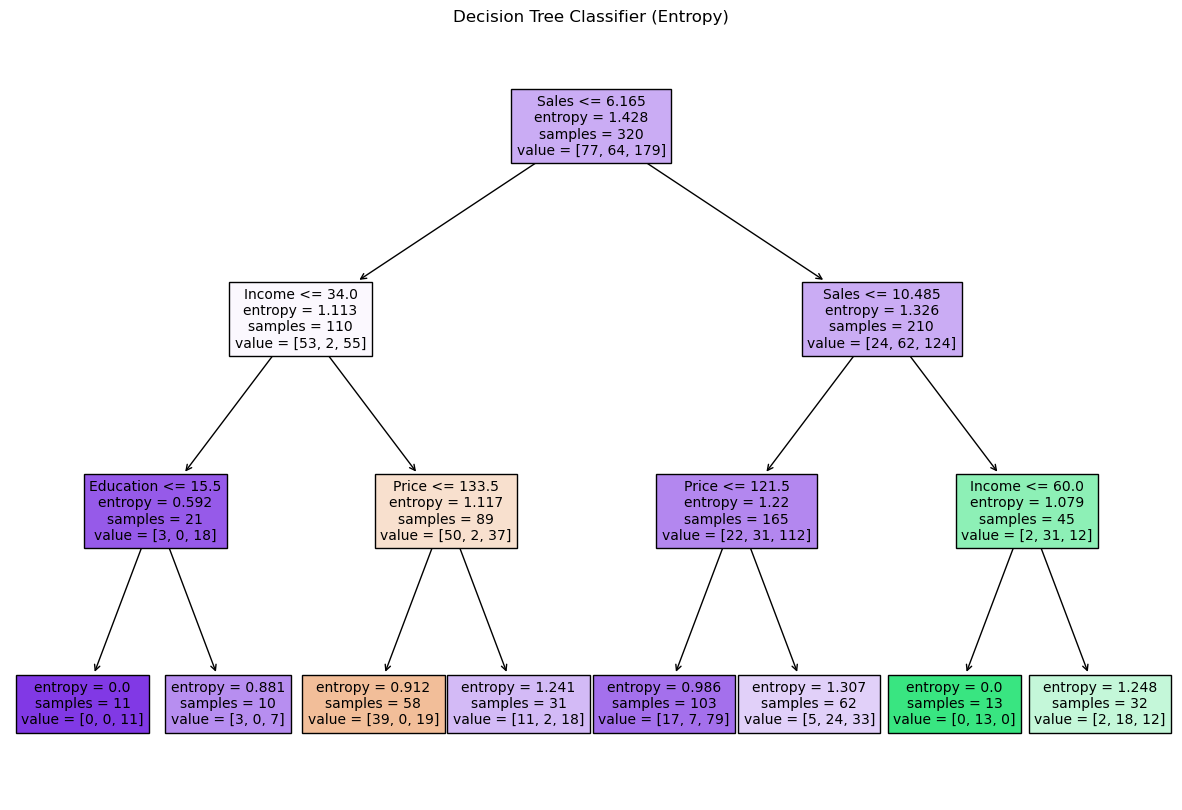

In [70]:
# Visualization
plt.figure(figsize=(33, 10))
# Decision Tree Classifier (Entropy)
plt.subplot(1, 2, 1)
plot_tree(best_clf_entropy, feature_names=X_cls.columns, filled=True, fontsize=10)
plt.title('Decision Tree Classifier (Entropy)')


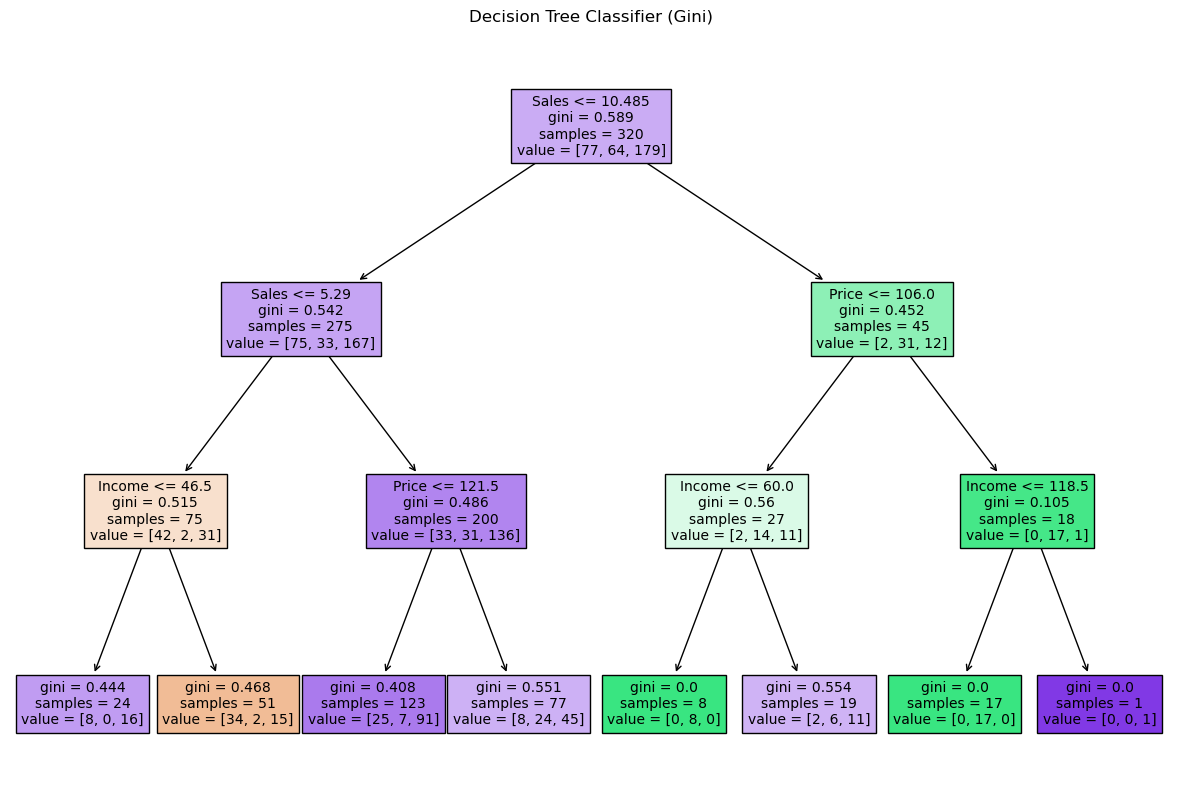

In [62]:
# Decision Tree Classifier (Gini)
plt.figure(figsize=(15, 10))

plot_tree(best_clf_gini, feature_names=X_cls.columns, filled=True, fontsize=10)
plt.title('Decision Tree Classifier (Gini)')

plt.show()

In [ ]:
#gini is much suitable for a classification model
#sales <-10.485 is chosen as the root node as it has highest gini index, 
#remaining attributes on the same bases are splitted until pure regions are formed